In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import folium
from folium import plugins
import geopandas

In [2]:
ROOT = "C:/Users/Beau/Documents/GitHub/RealEstate"
RAW = os.path.join(ROOT, "data", "raw")
SERIALIZED = os.path.join(ROOT, "data", "serialized")
CLEANED = os.path.join(ROOT, "data", "processed")

In [3]:
# serialize data
# path = os.path.join(RAW, "Building_Permits.csv")
# df = pd.read_csv(path)
# df.to_pickle(os.path.join(SERIALIZED, "Building_Permits.pkl"))

In [4]:
df = pd.read_pickle(os.path.join(SERIALIZED, "Building_Permits.pkl"))

In [5]:
# format dates
df.APPLICATION_START_DATE = pd.to_datetime(df.APPLICATION_START_DATE)
df.ISSUE_DATE = pd.to_datetime(df.ISSUE_DATE)
df["issue_day"] = df["ISSUE_DATE"].dt.day
df["issue_month"] = df["ISSUE_DATE"].dt.month
df["issue_year"] = df["ISSUE_DATE"].dt.year

# subset to permits issued since 2016
idx = df.ISSUE_DATE > pd.to_datetime("1/1/2016")
df = df.loc[idx]

In [6]:
# filter out irrelevant rows

df = df.loc[df["LATITUDE"].notnull()]

# 'PERMIT - WRECKING/DEMOLITION'
# 'PERMIT - EASY PERMIT PROCESS'
# 'PERMIT - SIGNS'
# 'PERMIT - RENOVATION/ALTERATION'
# 'PERMIT - ELECTRIC WIRING'
# 'PERMIT - NEW CONSTRUCTION'
# 'PERMIT - ELEVATOR EQUIPMENT'
# 'PERMIT - REINSTATE REVOKED PMT'
# 'PERMIT - SCAFFOLDING'
permits_of_interest = [
    # 'PERMIT - WRECKING/DEMOLITION',
    # 'PERMIT - EASY PERMIT PROCESS',
    # 'PERMIT - SIGNS',
    "PERMIT - RENOVATION/ALTERATION",
    # 'PERMIT - ELECTRIC WIRING',
    "PERMIT - NEW CONSTRUCTION",
    # 'PERMIT - ELEVATOR EQUIPMENT',
    # 'PERMIT - REINSTATE REVOKED PMT',
    # 'PERMIT - SCAFFOLDING'
]
idx = df.PERMIT_TYPE.isin(permits_of_interest)
df = df.loc[idx]

In [7]:
# drop unnecessary columns
df = df[
    [
        "PERMIT#",
        "PERMIT_TYPE",
        "REVIEW_TYPE",
        "APPLICATION_START_DATE",
        "ISSUE_DATE",
        "PROCESSING_TIME",
        "STREET_NUMBER",
        "STREET DIRECTION",
        "STREET_NAME",
        "SUFFIX",
        "WORK_DESCRIPTION",
        "TOTAL_FEE",
        "REPORTED_COST",
        "COMMUNITY_AREA",
        "CENSUS_TRACT",
        "WARD",
        "LATITUDE",
        "LONGITUDE",
        "LOCATION",
        "issue_day",
        "issue_month",
        "issue_year",
    ]
]

<AxesSubplot:title={'center':'Number of Building Permits per Year'}, xlabel='issue_year'>

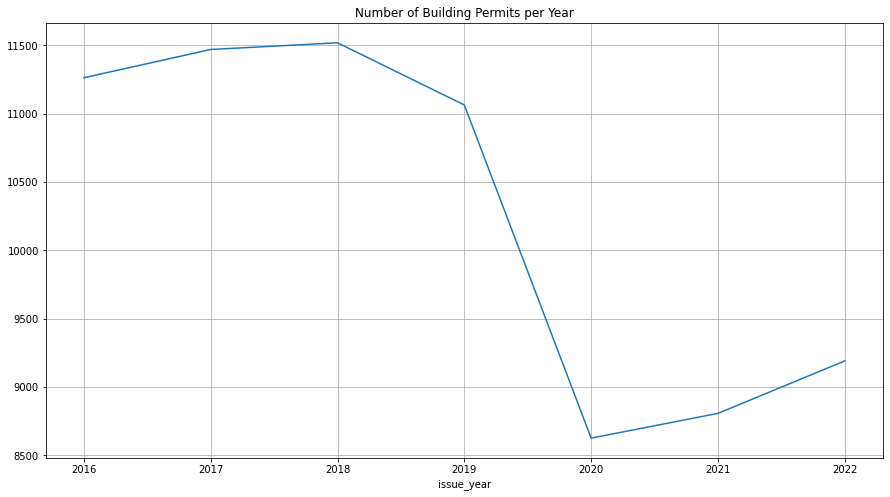

In [8]:
df.groupby("issue_year")["PERMIT#"].count().plot(
    title="Number of Building Permits per Year", figsize=(15, 8), grid=True
)

In [9]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

geometry = geopandas.points_from_xy(df.LONGITUDE, df.LATITUDE)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geometry]
plugins.HeatMap(heat_data, radius=3, blur=3).add_to(m)

m

In [10]:
# save to processed folder
df.to_pickle(os.path.join(ROOT, "data", "processed", "Building_Permits.pkl"))